In [11]:
from gplearn.genetic import SymbolicRegressor
from sklearn.utils.random import check_random_state
import matplotlib.pyplot as plt
import numpy as np


In [225]:
random_engine = check_random_state(0)
X_train = np.sin(np.linspace(1, 100, 10000))
X_train = np.reshape(X_train, (5000,2))
Y_train = np.sqrt(np.sum(X_train * X_train + X_train * X_train * X_train, axis=1))

X_test = np.sin(np.linspace(1, 100, 10000))
X_test = np.reshape(X_test, (5000,2))
Y_test = np.sqrt(np.sum(X_test * X_test + X_test * X_test * X_test, axis=1))


In [260]:
est_gp = SymbolicRegressor(population_size=150, generations=50,
                               stopping_criteria=0.01, verbose=1, n_jobs=4,
                               function_set=('add', 'mul', 'max', 'sub', 'sin', 'sqrt', 'log'))


In [261]:
est_gp.fit(X_train, Y_train)


    |    Population Average   |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    14.69 1.1275853917112113       17 0.2330501645002114              N/A     18.73s
   1    12.59 0.5007065793005444       51 0.14064202346598928              N/A     21.03s
   2    20.86 0.4235938811056061       14 0.10125665079804423              N/A     19.76s
   3    32.41 0.2726260855677906       42 0.09911879687001586              N/A     19.39s
   4    19.82 0.25004331723100676       17 0.06880472891762841              N/A     19.08s
   5    15.69 0.2393630488813569       24 0.06880452748486814              N/A     18.72s
   6    16.58 0.21259992576740044       28 0.06880452748486814              N/A     18.23s
   7    14.33 0.2162749413463225       28 0.06509220049330638              N/A     17.82s
   8    14.82 0.17664656712130325 

SymbolicRegressor(const_range=(-1.0, 1.0),
         function_set=('add', 'mul', 'max', 'sub', 'sin', 'sqrt', 'log'),
         generations=50, init_depth=(2, 6), init_method='half and half',
         max_samples=1.0, metric='mean absolute error', n_jobs=4,
         p_crossover=0.9, p_hoist_mutation=0.01, p_point_mutation=0.01,
         p_point_replace=0.05, p_subtree_mutation=0.01,
         parsimony_coefficient=0.001, population_size=150,
         random_state=None, stopping_criteria=0.01, tournament_size=20,
         verbose=1, warm_start=False)

In [262]:
score_train = est_gp.score(X_train, Y_train)
score_test = est_gp.score(X_test, Y_test)
predicted = est_gp.predict(X_test)
print(score_train, score_test)


0.9792012024116351 0.9792012024116351


Text(0.5, 1.0, 'Prediction vs Actual Result Analysis')

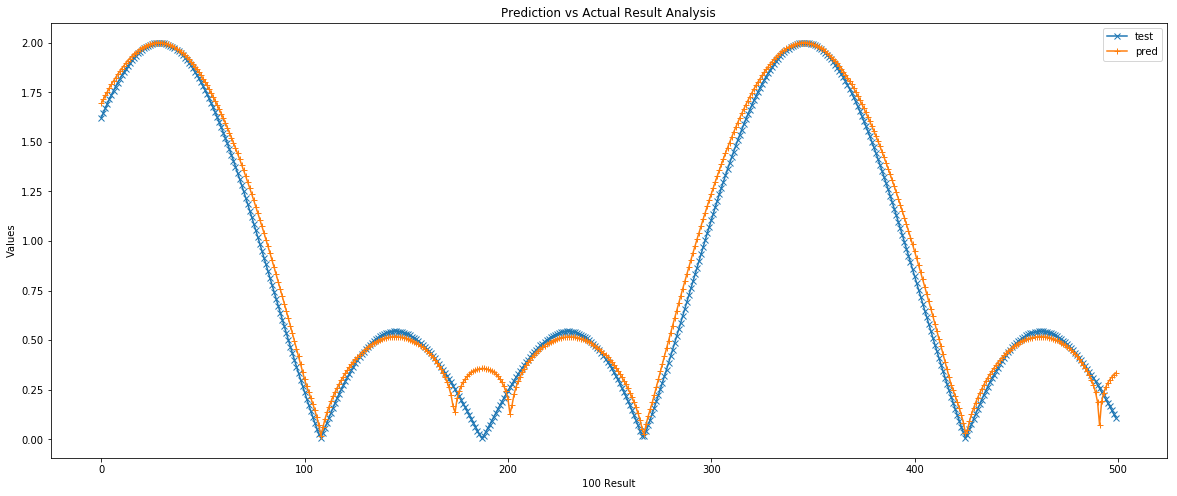

In [263]:
plt.figure(figsize=(20,8))
plt.plot(Y_test[:500], marker='x', label='test')
plt.plot(predicted[:500], marker='+', label='pred')
plt.xlabel("100 Result")
plt.ylabel("Values")
plt.legend()
plt.title("Prediction vs Actual Result Analysis")
